Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Min Khant Soe"
ID = "122277"

---

# Lab 11: Unsupervised Learning with $k$-means

In this lab, we begin our survey of common unsupervised learning methods.

## Supervised vs. Unsupervised Learning

As we know, in the supervised setting, we are presented with a set of training pairs $(\mathbf{x}^{(i)},y^{(i)}), \mathbf{x}^{(i)} \in {\cal X}, y^{(i)} \in {\cal Y},
i \in 1..m$,
where typically ${\cal X} = \mathbb{R}^n$ and either ${\cal Y} = \mathbb{R}$ (regression) or ${\cal Y} = \{ 1, \ldots, k \}$ (classification). The goal is, given a new
$\mathbf{x} \in {\cal X}$ to come up with the best possible prediction $\hat{y} \in {\cal Y}$ corresponding to $\mathbf{x}$ or a set of predicted probabilities
$p(y=y_i \mid \mathbf{x}), i \in \{1, \ldots, k\}$.

In the *unsupervised setting*, we are presented with a set of training items $\mathbf{x}^{(i)} \in {\cal X}$ without any labels or targets. The goal is generally to
understand, given a new $\mathbf{x} \in {\cal X}$, the relationship of $\mathbf{x}$ with the training examples $\mathbf{x}^{(i)}$.

The phrase *understand the relationship* can mean many different things depending on the problem setting. Among the most common specific goals is *clustering*, in which
we map the training data to $K$ *clusters*, then, given $\mathbf{x}$, find the most similar cluster $c \in \{1,\ldots,K\}$.

## $k$-means Clustering

Clustering is the most common unsupervised learning problem, and $k$-means is the most frequently used clustering algorithm. $k$-means is suitable when 
${\cal X} = \mathbb{R}^n$ and Euclidean distance is a reasonable model of dissimilarity between items in ${\cal X}$.

The algorithm is very simple:
1. Randomly initialize $k$ cluster centroids $\mu_1, \ldots, \mu_k \in \mathbb{R}^n$.
2. Repeat until convergence:
  1. For $i \in 1..m, c^{(i)} \leftarrow \text{argmin}_j \| \mathbf{x}^{(i)} - \mu_j \|^2.$
  2. For $j \in 1..k,$
     $$ \mu_j \leftarrow \frac{\sum_{i=1}^m \delta(c^{(i)} = j)\mathbf{x}^{(i)}}{\sum_{i=1}^m \delta(c^{(i)}=j)}$$

## In-Lab Exercise With Synthetic Data

In this exercise, you will
write Python code to generate 100 examples from each of three different well-separated 2D Gaussian distributions. Then you'll plot the data, initialize three arbitrary means,
and animate the process of iterative cluster assignment and cluster mean assignment.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    There is a naive implementation of the algorithm in this notebook below. You can use it as
    a beginning point or make your own implementation from scratch.
</details>

### Exercise 1.1 (5 points)

Generate 100 examples from each of **three different well-separated 2D Gaussian distributions**.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html">make_blobs</a>
    function from sklearn to synthesize the dataset,
    or you can do it yourself with `np.random.multivariate_normal`. :)
</details>

In [2]:
from sklearn.datasets import make_blobs
# X=None
# y=None
X, y = make_blobs(n_samples=300,  n_features=2, centers=3,
                       cluster_std=0.60, random_state=0)
# YOUR CODE HERE
# raise NotImplementedError()
print(X.shape, y.shape)

(300, 2) (300,)


In [3]:
import numpy as np
print('X.shape', X.shape)
print('y.shape', y.shape)
print('X=\n', X[:5])
print('y=\n', y[:5])

print(y.min(), y.max())
print(len(np.unique(y)))

# Test function: Do not remove
assert X.shape == (300, 2), 'Size of X is incorrect'
assert y.shape == (300,) or y.shape == 300 or y.shape == (300,1), 'Size of y is incorrect'
assert len(np.unique(y)) == 3, 'Number groups of samples are incorrect'
for i in np.unique(y):
    assert isinstance(i, np.int64) or isinstance(i, int), 'group type is incorrect'

print("success!")
# End Test function

X.shape (300, 2)
y.shape (300,)
X=
 [[ 0.42857674  4.9739971 ]
 [ 1.61990909  0.06764529]
 [ 1.43289271  4.37679234]
 [-1.57846247  3.03445802]
 [-1.65862863  2.26746029]]
y=
 [0 1 0 2 2]
0 2
3
success!


### Exercise 1.2 (5 points)

Plot the data, separating the clusters by color.

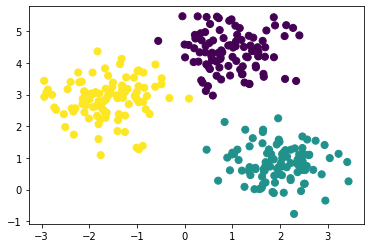

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
# YOUR CODE HERE
# raise NotImplementedError()

**Expected result** (or similar):

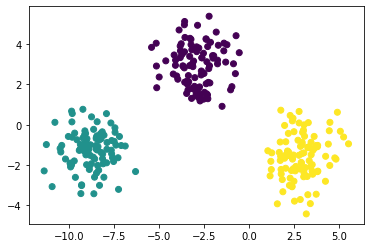

### Exercise 1.3 (20 points)

Initialize three arbitrary means, and animate the process of iterative cluster assignment and cluster mean assignment.

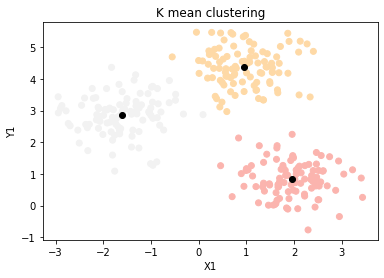

In [5]:
import numpy as np
from IPython.display import clear_output
import time
import random

m=X.shape[0]
n=X.shape[1]
# 1. Initialize three random cluster centers
indexes = np.random.choice(m, size = 3, replace = False)
centers = X[indexes,:]
print(centers.shape)
# centers = np.array([]).reshape(n,0) 
# print(centers.shape)
# centers = None
k = centers.shape[0]

print(X.shape)
while True:

    # 2. Find the nearest cluster center for each point
    distance = np.zeros((m,k))
    for i in range(3):
        distance[:,i] = np.square(X - centers[i,:]).sum(axis = 1)
    assignments = np.argmin(distance, axis = 1)
    # 3. Plot the data showing the cluster centers. Do not forget to use clear_output.
    clear_output(wait = True)
    plt.scatter(X[:,0], X[:, 1], c = assignments, cmap = plt.get_cmap('Pastel1'))
    plt.scatter(centers[:,0],centers[:,1], c = "black")
    plt.xlabel('X1')
    plt.ylabel('Y1')
    plt.title("K mean clustering")
    plt.show()
    # 4. Find the mean of the points assigned to each cluster center
    means = np.zeros((k,2))
    for i in range(3):
        means[i,:] = np.mean(X[assignments == i, :], axis = 0)
    # 5. Calculate the sum squared error between the currently assigned points' mean
    #    and the current center. If this error is less than 1e-6, stop the loop.

    # error = 0
    error = np.square(means -centers).sum()
    if error < 1e-6:
        break
    centers = means
    time.sleep(0.3)

# YOUR CODE HERE
# raise NotImplementedError()

In [6]:
print(centers)

# Test function: Do not remove
assert centers.shape == (2, 3) or centers.shape == (3, 2), 'Size of centers is incorrect'

print("success!")
# End Test function

[[ 1.95159369  0.83467497]
 [ 0.95625704  4.37226546]
 [-1.60811992  2.85881658]]
success!


**Expected result** (or similar):

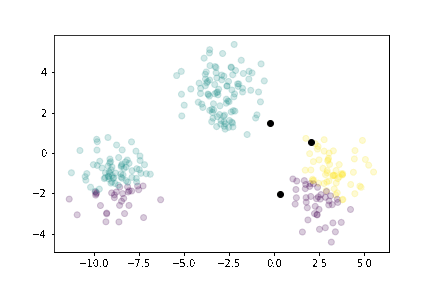

## Example with Kaggle Customer Segmentation Data

This example is based on the [Kaggle Mall Customers Dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) and [Caner Dabakoglu's](https://www.kaggle.com/cdabakoglu) tutorial on the dataset. The goal is customer segmentation.

The dataset has 5 columns, `CustomerID`, `Gender`, `Age`, `Annual Income`, and `Spending score`.
We will use three of these variables, namely `Age`, `Annual Income`, and `Spending score` for segmenting customers.
(Give some thought to why we don't use `CustomerID` or `Gender`.)

First, let's import some libraries:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Next we read the data set and print out some information about it.

In [8]:
df = pd.read_csv("Mall_Customers.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Dataset head (first five rows):



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Let's drop the `CustomerID` column, as it's not useful.

In [9]:
df.drop(["CustomerID"], axis = 1, inplace=True)

Next, let's visualize the marginal distribution over each variable, to get an idea of how cohesive they are. We can see that the variables are not
quite Gaussian and have some skew:

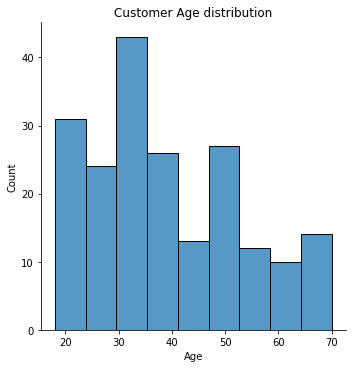

In [10]:
sns.displot(df.Age)
_ = plt.title('Customer Age distribution')

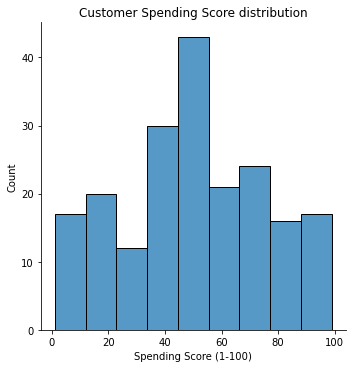

In [11]:
sns.displot(df['Spending Score (1-100)'])
_ = plt.title('Customer Spending Score distribution')

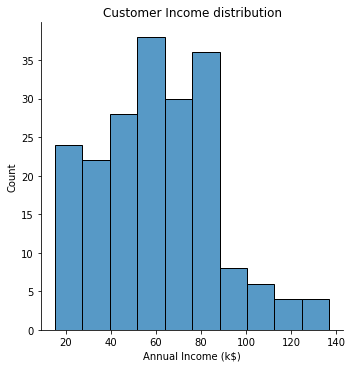

In [12]:
sns.displot(df['Annual Income (k$)'])
_ = plt.title('Customer Income distribution')

Next, let's make a 3D scatter plot of the relevant variables:

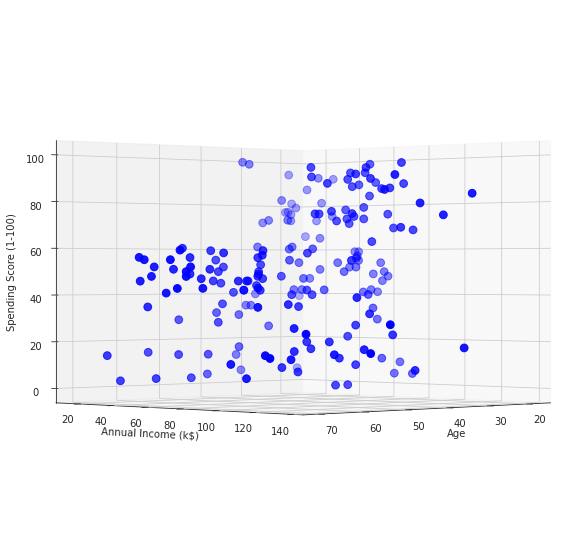

In [13]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age, df["Annual Income (k$)"], df["Spending Score (1-100)"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Next, let's implement $k$-means:

In [14]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

Let's build models with $k \in 1..20$, plot the distortion for each $k$, and try to choose a good value for $k$ using the so-called "elbow method."

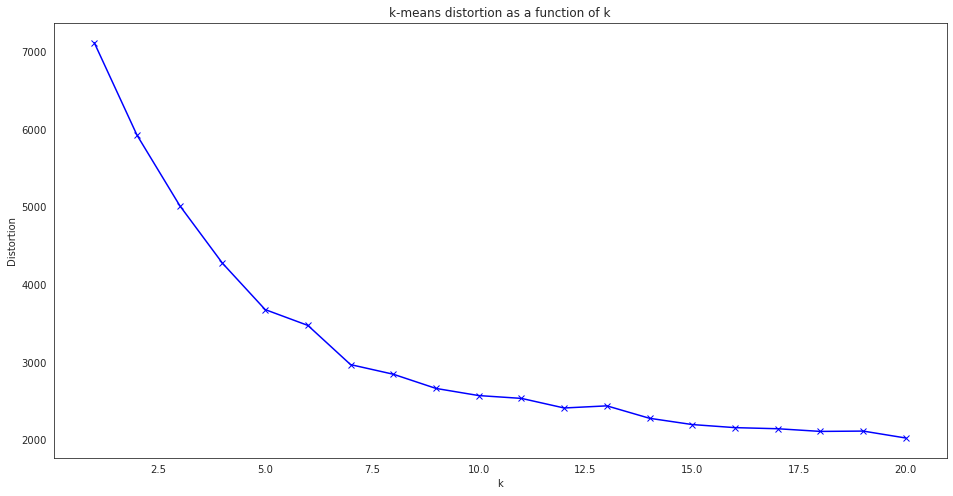

In [15]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 20
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    means = init_kmeans(X, k)
    prev_distortion = 0
    while True:
        means, c, distortion = iterate_kmeans(X, means)
        if prev_distortion > 0 and prev_distortion - distortion < epsilon:
            break
        prev_distortion = distortion
    distortions[k-1] = distortion

# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

Read about the so-called "elbow method" in [Wikipedia](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Note what it says,
that "In practice there may not be a sharp elbow, and as a heuristic method, such an 'elbow' cannot always be unambiguously identified." 

Do you see a unique elbow in the distortion plot above?

Note that the results are somewhat noisy, being dependent on initial conditions.

Here's a visualization of the results for three clusters:

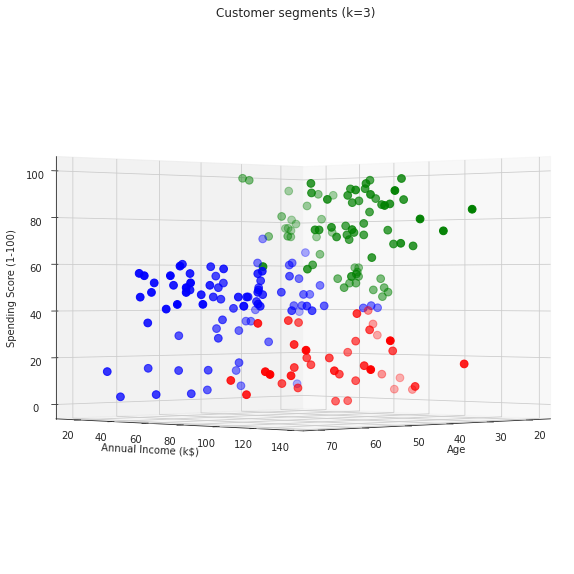

In [16]:
# Re-run k-means with k=3

k = 3
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## In-Lab Exercise 2

In this exercise we'll try to understand the three clusters above and also do a better job with the elbow plot.


### Exercise 2.1 (10 points)

Consider the three cluster centers above. Look at the three means closely and come up with English descriptions of each cluster from a business point of view. Label the clusters in the visualization accordingly.

In [17]:
# YOUR CODE HERE
df[df.label == 0].mean() 
# raise NotImplementedError()

Age                       47.282353
Annual Income (k$)        44.858824
Spending Score (1-100)    41.811765
label                      0.000000
dtype: float64

First cluster (blue color): middle-aged people (above 35 and below 60) with medium income (above 35 and below 60) and medium expenditure (above 35 and below 60).

In [18]:
df[df.label == 1].mean()

Age                       40.394737
Annual Income (k$)        87.000000
Spending Score (1-100)    18.631579
label                      1.000000
dtype: float64

Second cluster (red color): middle-aged people (above 35 and below 60) with high income (above 60) and low expenditure (below 35).

In [19]:
df[df.label == 2].mean()

Age                       28.779221
Annual Income (k$)        64.844156
Spending Score (1-100)    75.038961
label                      2.000000
dtype: float64

Third cluster (green color): young-aged people (above 18 and below 35) with high income (above 60) and high expenditure (above 60).

### Exercise 2.2 (20 points)

Note that the distortion plot is quite noisy due to random initial conditions. Modify the optimization to perform, for each $k$, several different runs, and take the minimum distortion over those runs. Re-plot the distortion plot and see if an "elbow" is more prominent.

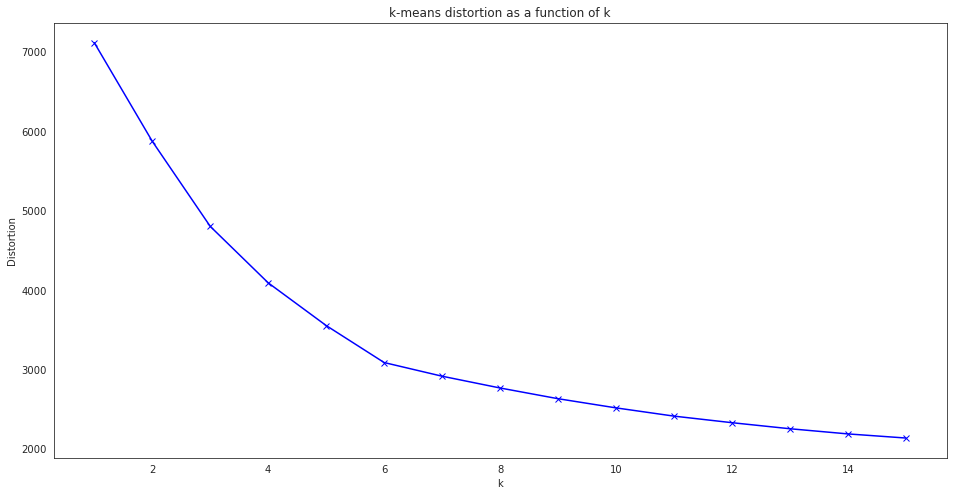

In [20]:
# Convert dataframe to matrix

X = np.array(df.iloc[:,1:])

# Intialize hyperparameters

max_k = 15
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)
max_iters = 20
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for iters in range(max_iters):
        means = init_kmeans(X, k)
        prev_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if prev_distortion > 0 and prev_distortion - distortion < epsilon:
                break
            prev_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion
    

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
# plt.plot(range(1,max_k+1), distortion_k, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

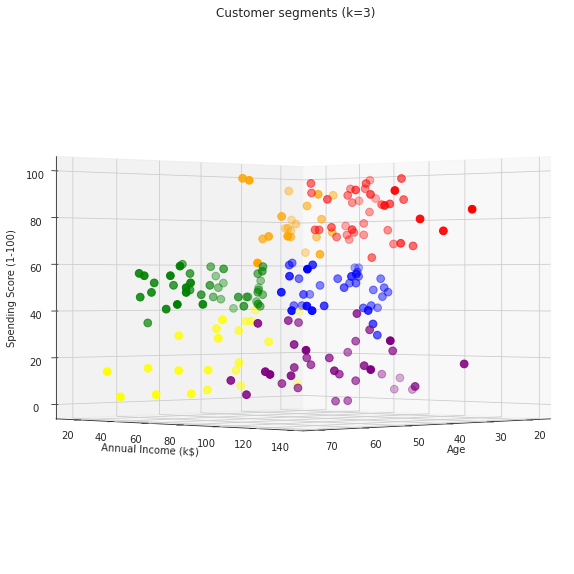

In [21]:
k = 6      #according to the elbow plot
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c

# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)

# For 5 clusters, you can uncomment the following two lines.

ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.scatter(df.Age[df.label == 5], df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='yellow', s=60)

ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer segments (k=3)')
plt.show()

## K-Means in PyTorch

Now, to get more experience with PyTorch, let's do the same thing with the library. First, some imports. You may need to install some packages for this to work:

    pip install kmeans-pytorch
    pip install tqdm
    
First, import the libraries:

In [22]:
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install kmeans-pytorch
!http_proxy=http://192.41.170.23:3128 https_proxy=http://192.41.170.23:3128 pip install tqdm

In [23]:
import torch
from kmeans_pytorch import kmeans

In [24]:
x = torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters=3, distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 17it [00:00, 615.37it/s, center_shift=0.000000, iteration=17, tol=0.000100]


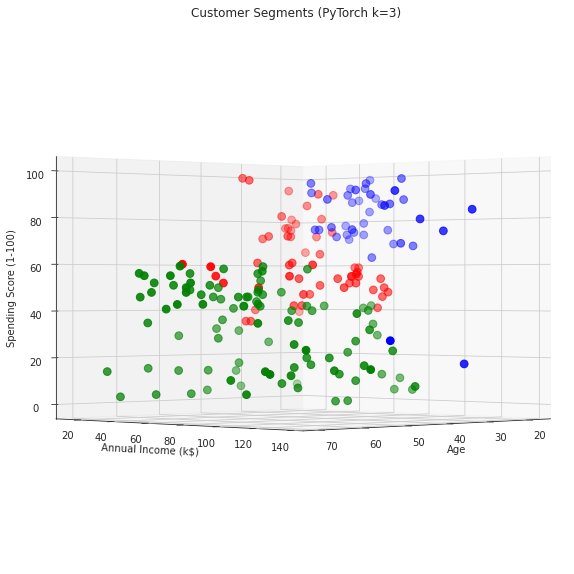

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
#ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
#ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 45)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments (PyTorch k=3)')
plt.show()

## Take-Home Exercise

Find an interesting dataset for unsupervised learning, prepare the data, and run $k$-means on it.

In a brief report, describe your in-lab and take home experiments and their results.

Dataset link: https://www.kaggle.com/datarohitingole/wine-data-clusteing-kmeans-elbow-method/data

In [26]:
df = pd.read_csv("wine-clustering.csv")

print('Dataset information:\n')
df.info()
print('\nDataset head (first five rows):\n')
df.head()

Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB

Dataset head (first five rows):



,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [28]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [29]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


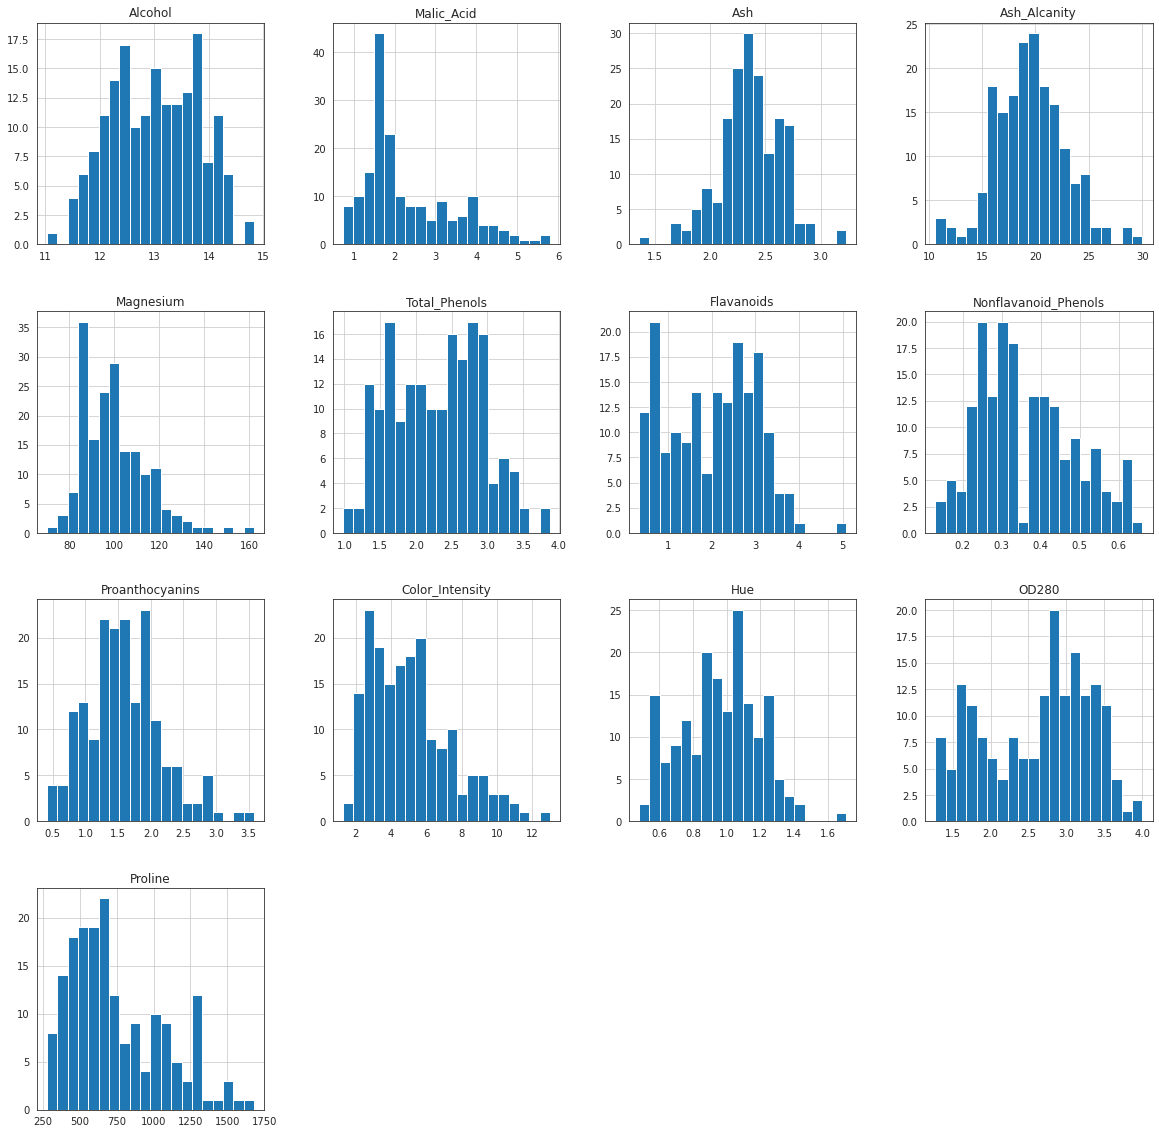

In [30]:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

In [31]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [32]:
df.drop(["Malic_Acid"], axis = 1, inplace=True)
df.drop(["Ash"], axis = 1, inplace=True)
df.drop(["Magnesium"], axis = 1, inplace=True)
df.drop(["Flavanoids"], axis = 1, inplace=True)
df.drop(["Nonflavanoid_Phenols"], axis = 1, inplace=True)
df.drop(["Proanthocyanins"], axis = 1, inplace=True)
df.drop(["Color_Intensity"], axis = 1, inplace=True)
df.drop(["Hue"], axis = 1, inplace=True)
df.drop(["OD280"], axis = 1, inplace=True)
df.drop(["Proline"], axis = 1, inplace=True)

In [33]:
df.columns

Index(['Alcohol', 'Ash_Alcanity', 'Total_Phenols'], dtype='object')

According to Histograms and heatmap, I choose 3 best features to use for this experiment.

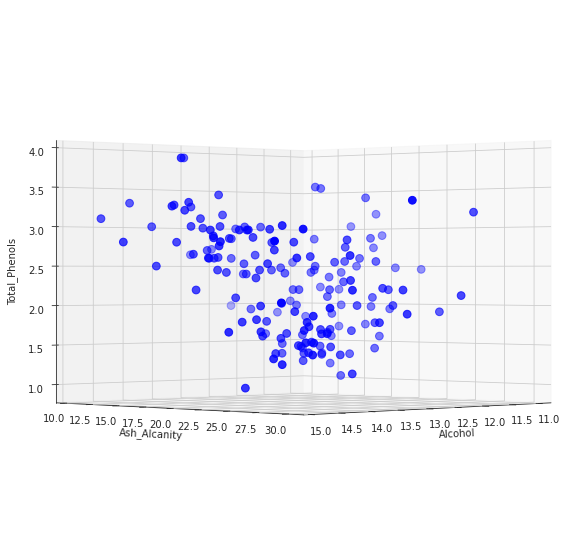

In [34]:
sns.set_style("white")
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Alcohol"], df["Ash_Alcanity"], df["Total_Phenols"], c='blue', s=60)
ax.view_init(0, 45)
plt.xlabel("Alcohol")
plt.ylabel("Ash_Alcanity")
ax.set_zlabel("Total_Phenols")
plt.show()

In [35]:
# Initialize a k-means model given a dataset

def init_kmeans(X, k):
    m = X.shape[0]
    n = X.shape[1]
    means = np.zeros((k,n))
    order = np.random.permutation(m)[:k]
    for i in range(k):
        means[i,:] = X[order[i],:]
    return means

# Run one iteration of k-means

def iterate_kmeans(X, means):
    m = X.shape[0]
    n = X.shape[1]
    k = means.shape[0]
    distortion = np.zeros(m)
    c = np.zeros(m)
    for i in range(m):
        min_j = 0
        min_dist = 0
        for j in range(k):
            dist_j = np.linalg.norm(X[i,:] - means[j,:])
            if dist_j < min_dist or j == 0:
                min_dist = dist_j
                min_j = j
        distortion[i] = min_dist
        c[i] = min_j
    for j in range(k):
        means[j,:] = np.zeros((1,n))
        nj = 0
        for i in range(m):
            if c[i] == j:
                nj = nj + 1
                means[j,:] = means[j,:] + X[i,:]
        if nj > 0:
            means[j,:] = means[j,:] / nj
    return means, c, np.sum(distortion)

In [36]:
# Convert dataframe to matrix
X = np.array(df.iloc[:,1:])
print(X.shape)

(178, 2)


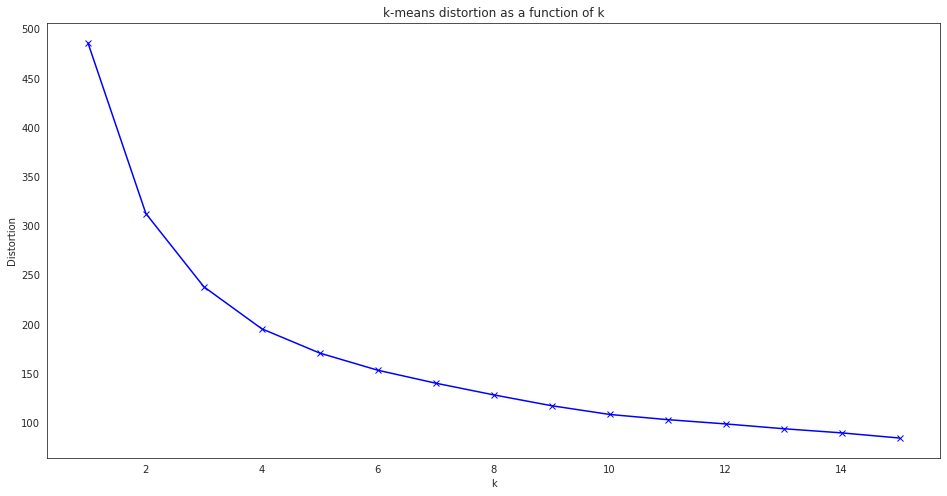

In [37]:
# Intialize hyperparameters

max_k = 15
epsilon = 0.001

# For each value of k, do one run and record the resulting cost (Euclidean distortion)

max_iters = 20
distortions = np.zeros(max_k)
for k in range(1, max_k + 1):
    min_distortion = np.inf
    for iters in range(max_iters):
        means = init_kmeans(X, k)
        prev_distortion = 0
        while True:
            means, c, distortion = iterate_kmeans(X, means)
            if prev_distortion > 0 and prev_distortion - distortion < epsilon:
                break
            prev_distortion = distortion
        if distortion < min_distortion:
            min_distortion = distortion
            min_c = c
            min_means = means
    distortions[k-1] = min_distortion
# Plot distortion as function of k

plt.figure(figsize=(16,8))
plt.plot(range(1,max_k+1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('k-means distortion as a function of k')
plt.show()

According to elbows, I chose that number of clusters as 4

In [38]:
k = 4
means = init_kmeans(X, k)
prev_distortion = 0
while True:
    means, c, distortion = iterate_kmeans(X, means)
    if prev_distortion > 0 and prev_distortion - distortion < epsilon:
        break
    prev_distortion = distortion
    
# Set labels in dataset to cluster IDs according to k-means model.

df["label"] = c
df["label"].unique()

array([1., 2., 0., 3.])

In [39]:
y =df["label"]
y.unique()

array([1., 2., 0., 3.])

In [40]:
df.columns

Index(['Alcohol', 'Ash_Alcanity', 'Total_Phenols', 'label'], dtype='object')

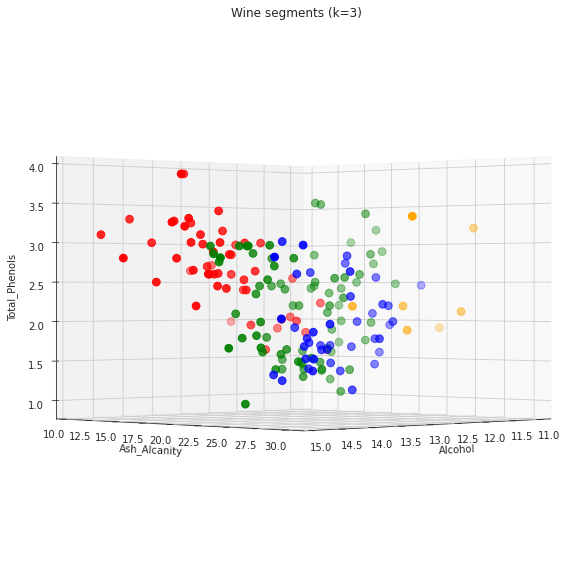

In [41]:
# Plot the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Alcohol"][df.label == 0], df["Ash_Alcanity"][df.label == 0], df["Total_Phenols"][df.label == 0], c='blue', s=60)
ax.scatter(df["Alcohol"][df.label == 1], df["Ash_Alcanity"][df.label == 1], df["Total_Phenols"][df.label == 1], c='red', s=60)
ax.scatter(df["Alcohol"][df.label == 2], df["Ash_Alcanity"][df.label == 2], df["Total_Phenols"][df.label == 2], c='green', s=60)
ax.scatter(df["Alcohol"][df.label == 3], df["Ash_Alcanity"][df.label == 3], df["Total_Phenols"][df.label == 3], c='orange', s=60)
# ax.scatter(df["Alcohol"][df.label == 4], df["Ash_Alcanity"][df.label == 4], df["Total_Phenols"][df.label == 4], c='purple', s=60)
# ax.scatter(df["Alcohol"][df.label == 5], df["Ash_Alcanity"][df.label == 5], df["Total_Phenols"][df.label == 5], c='yellow', s=60)

ax.view_init(0, 45)
plt.xlabel("Alcohol")
plt.ylabel("Ash_Alcanity")
ax.set_zlabel('Total_Phenols')
plt.title('Wine segments (k=3)')
plt.show()

In [42]:
import torch
from kmeans_pytorch import kmeans

In [43]:
x = torch.from_numpy(X)
device = 'cuda:0'
device = 'cpu'
c, means = kmeans(X=x, num_clusters = 4 , distance='euclidean', device=torch.device(device))
df["label"] = c

running k-means on cpu..


[running kmeans]: 9it [00:00, 605.00it/s, center_shift=0.000000, iteration=9, tol=0.000100]


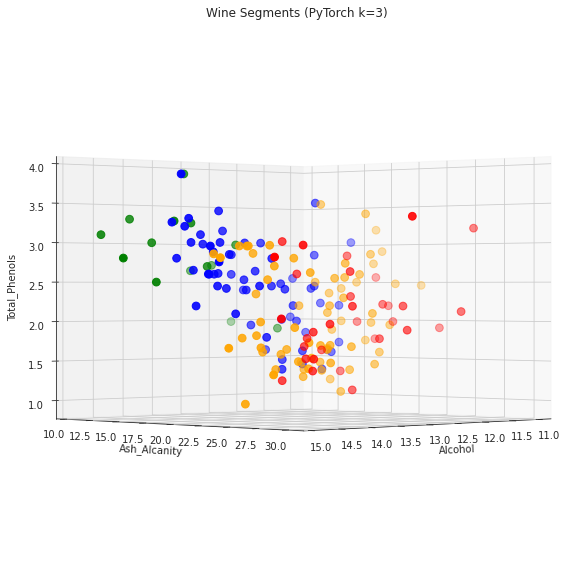

In [44]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Alcohol"][df.label == 0], df["Ash_Alcanity"][df.label == 0], df["Total_Phenols"][df.label == 0], c='blue', s=60)
ax.scatter(df["Alcohol"][df.label == 1], df["Ash_Alcanity"][df.label == 1], df["Total_Phenols"][df.label == 1], c='red', s=60)
ax.scatter(df["Alcohol"][df.label == 2], df["Ash_Alcanity"][df.label == 2], df["Total_Phenols"][df.label == 2], c='green', s=60)
ax.scatter(df["Alcohol"][df.label == 3], df["Ash_Alcanity"][df.label == 3], df["Total_Phenols"][df.label == 3], c='orange', s=60)
# ax.scatter(df["Alcohol"][df.label == 4], df["Ash_Alcanity"][df.label == 4], df["Total_Phenols"][df.label == 4], c='purple', s=60)
# ax.scatter(df["Alcohol"][df.label == 5], df["Ash_Alcanity"][df.label == 5], df["Total_Phenols"][df.label == 5], c='yellow', s=60)

ax.view_init(0, 45)
plt.xlabel("Alcohol")
plt.ylabel("Ash_Alcanity")
ax.set_zlabel('Total_Phenols')
plt.title('Wine Segments (PyTorch k=3)')
plt.show()

In in-class assignment, I analyze the data and interpreted in English description from business point of view and edited the code by adding iteration for each k to improve the elbow curves. Then the number of clusters (k) is changed.

In this takehome assignment, I use wine clustering dataset from Kaggle. I chose and used 3 columns after checking histograms. I plotted elbow plot to find k value and 3D scatter plot. I used the same k value and plotted 3D scatter plot using pytorch. The results were same. In take home experiment, elbow curve is smoother than in in-class, thus, I choose the smaller k which I consider enough for optimization.